Preparando o ambiente

In [1]:
# # Clonando pasta do github
# if 'google.colab' in str(get_ipython()):
#     !git clone https://github.com/tiagofiorini/MLinPhysics.git
#     import os as os
#     os.chdir('./MLinPhysics')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
# Leitura do arquivo de dados
df = pd.read_excel('aula19_dados_serie_temporal.xlsx', sheet_name='dados')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True) # dataframe indexado pela data
df.head()

,temp,rad,press,precip,tdew,iasas,nino,saodi,urb
datetime,,,,,,,,,
1979-01-01,19.073,6.057392e+08,928.97752,162,16.438,-2.4392,-1.53,0.4808,NaN
1979-02-01,21.431,5.623097e+08,928.46201,147,18.536,-0.1843,-1.34,-0.0112,NaN
1979-03-01,19.677,5.568873e+08,930.56931,230,17.104,-2.2089,-1.16,0.3828,NaN
1979-04-01,18.155,4.413918e+08,931.61565,120,15.682,-2.1214,-1.18,0.3738,NaN
1979-05-01,17.527,3.928976e+08,931.51010,128,14.179,1.4192,-1.07,-0.0231,NaN


In [13]:
df

,temp,rad,press,precip,tdew,iasas,nino,saodi,urb
datetime,,,,,,,,,
1979-01-01,19.073,6.057392e+08,928.97752,162,16.438,-2.4392,-1.53,0.4808,NaN
1979-02-01,21.431,5.623097e+08,928.46201,147,18.536,-0.1843,-1.34,-0.0112,NaN
1979-03-01,19.677,5.568873e+08,930.56931,230,17.104,-2.2089,-1.16,0.3828,NaN
1979-04-01,18.155,4.413918e+08,931.61565,120,15.682,-2.1214,-1.18,0.3738,NaN
1979-05-01,17.527,3.928976e+08,931.51010,128,14.179,1.4192,-1.07,-0.0231,NaN
...,...,...,...,...,...,...,...,...,...
2022-08-01,16.243,4.471783e+08,935.77642,64,11.744,-1.5049,0.25,0.2022,0.191362
2022-09-01,16.152,4.572699e+08,933.30549,133,12.541,-1.2323,0.15,0.4662,0.191455
2022-10-01,19.974,6.150278e+08,931.08416,150,16.617,-0.4183,0.10,0.4198,0.191545


# Arima Temperatura RMSP

Neste exercício vamos trabalhar apenas com a série temporal de temperatura.

<Axes: xlabel='datetime'>

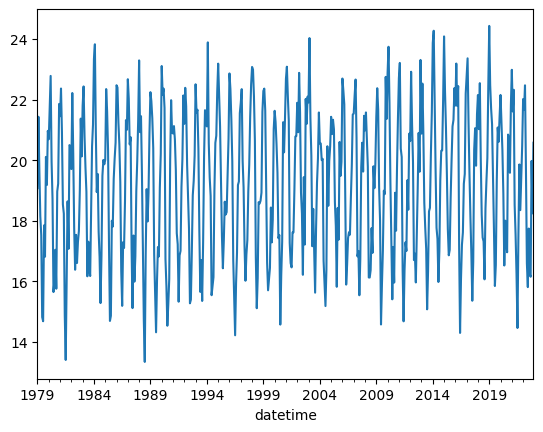

In [4]:
temp = df.temp
temp.plot()

Decomposição da série temporal em: tendência, sazonalidade e componente restante.

In [ ]:
## teste estimar a media movel com um valor multiplo da sazonalidade!

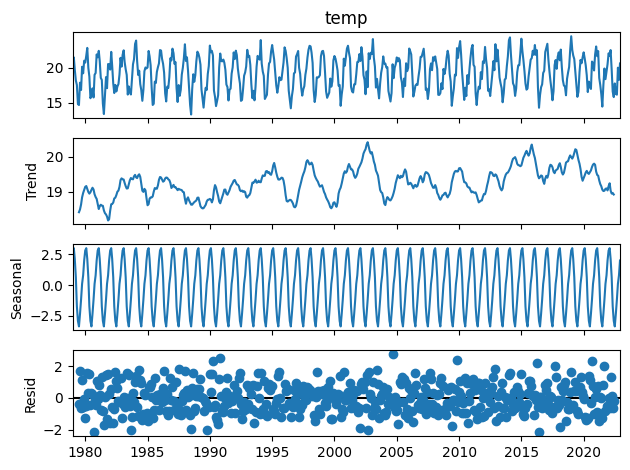

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
tempdec = seasonal_decompose(temp, model='additive')
tempdec.plot()
plt.show()

Obtendo as funções de autocorrelação (ACF) e autocorrelação parcial (PACF)

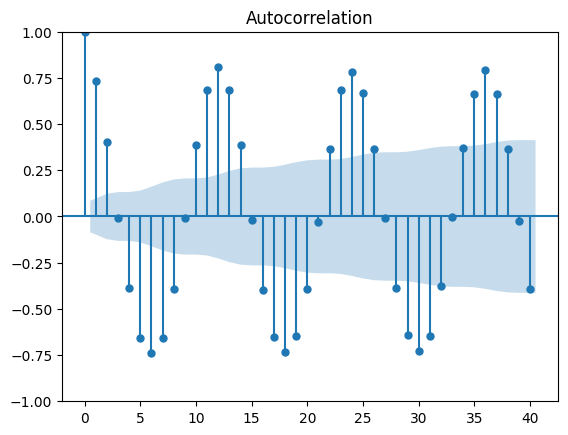

In [6]:
sm.graphics.tsa.plot_acf(temp, lags=40)
plt.show()

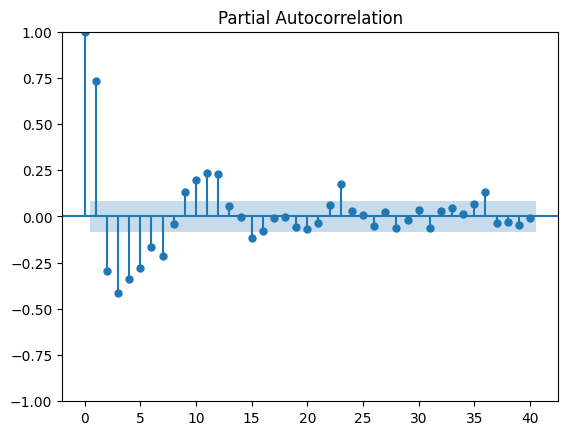

In [7]:
sm.graphics.tsa.plot_pacf(temp, lags=40)
plt.show()

Vemos que a série temporal possui uma forte sazonalidade. Vamos fazer uma primeira tentativa de ajustar um modelo SARIMA aos dados de temperatura.

/Users/luanareis/opt/anaconda3/envs/env_AI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/luanareis/opt/anaconda3/envs/env_AI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/luanareis/opt/anaconda3/envs/env_AI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                  528
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1004.603
Date:                Mon, 10 Jun 2024   AIC                           2015.206
Time:                        15:40:44   BIC                           2028.014
Sample:                    01-01-1979   HQIC                          2020.220
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.2408      0.266     72.231      0.000      18.719      19.763
ar.L1          0.7328      0.034     21.724      0.000       0.667       0.799
sigma2         2.6273      0.188     13.939      0.0

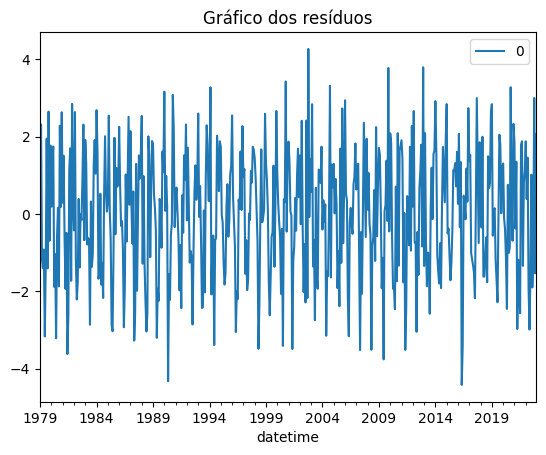

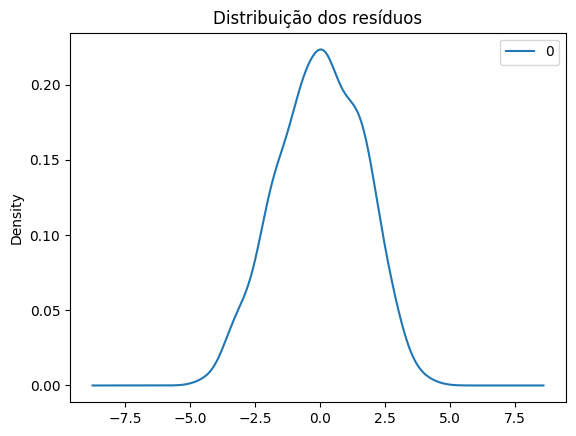

                0
count  528.000000
mean     0.000234
std      1.622459
min     -4.418025
25%     -1.157341
50%      0.091759
75%      1.247928
max      4.264399


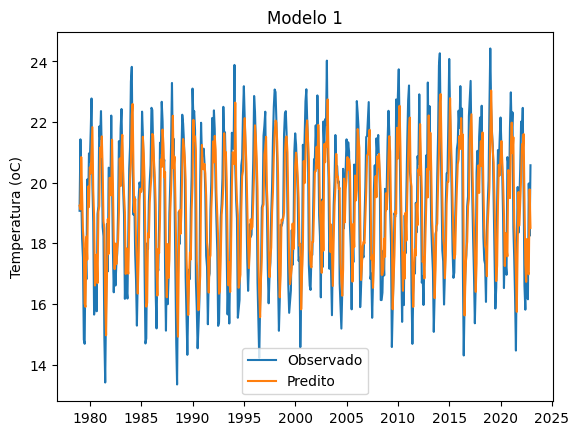

In [14]:
from statsmodels.tsa.arima.model import ARIMA
# fit model
model1 = ARIMA(temp, order=(1,0,0)) # (p, d, q): (AR, I, MA)
model1_fit = model1.fit()
# summary of fit model
print(model1_fit.summary())
# line plot of residuals
residuals1 = pd.DataFrame(model1_fit.resid)
residuals1.plot(title='Gráfico dos resíduos')
plt.show()
# density plot of residuals
residuals1.plot(kind='kde', title='Distribuição dos resíduos')
plt.show()
# summary stats of residuals
print(residuals1.describe())
# Aplicando o modelo aos dados
pred1 = model1.fit().predict()
plt.plot(temp.index, temp, label='Observado')
plt.plot(pred1.index, pred1, label='Predito')
plt.ylabel('Temperatura (oC)')
plt.title('Modelo 1')
plt.legend()
plt.show()

Usando auto ARIMA para procurar o melhor modelo (determinação da ordem do modelo)

In [15]:
# É preciso instalar a biblioteca autoarima (pmdarima) no colab:
!pip install statsmodels
!pip install pmdarima

In [16]:
import statsmodels.api as sm
import pmdarima as pmd
autoarima=pmd.auto_arima(temp,start_p=1,start_q=0,m=12,seasonal=True,trace=True)
# m: number of periods in each season (ex: 12 for monthly data)
# seasonal: Whether to fit a seasonal ARIMA. Default is True.
# trace: Whether to print status on the fits.


Performing stepwise search to minimize aic
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1593.528, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2420.914, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1785.935, Time=0.62 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1961.188, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4630.758, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1898.328, Time=0.31 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=1602.626, Time=2.39 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=2.32 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2015.206, Time=0.10 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=1868.246, Time=1.10 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=2.23 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.64 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1676.472, Time=0.57 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=1646.253, Time=0.99 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept

/Users/luanareis/opt/anaconda3/envs/env_AI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/luanareis/opt/anaconda3/envs/env_AI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/luanareis/opt/anaconda3/envs/env_AI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               temp   No. Observations:                  528
Model:             ARIMA(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -775.547
Date:                            Mon, 10 Jun 2024   AIC                           1561.095
Time:                                    15:46:57   BIC                           1582.440
Sample:                                01-01-1979   HQIC                          1569.451
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.1989      0.759     25.311      0.000      17.712      20.686
ar.L1          0.2147      0.045   

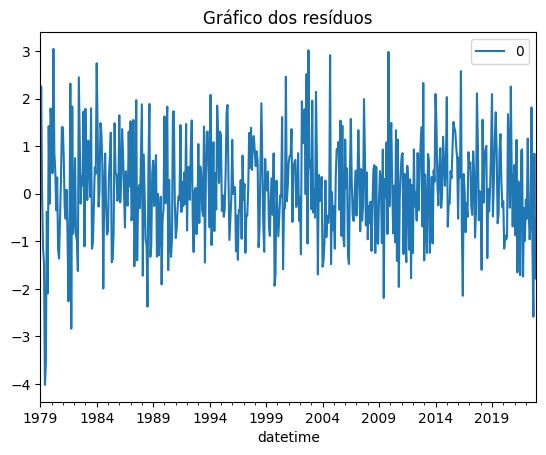

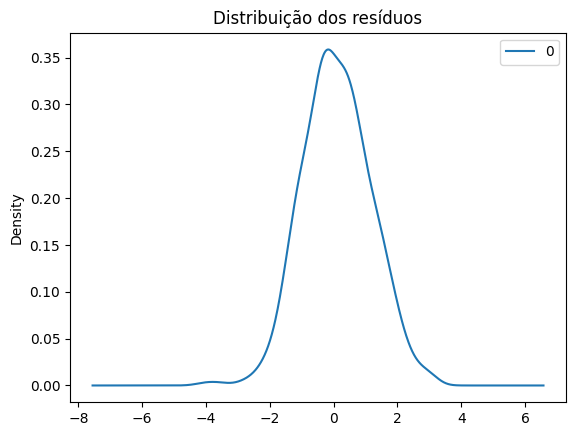

                0
count  528.000000
mean     0.099557
std      1.067011
min     -4.020955
25%     -0.584673
50%      0.055824
75%      0.837621
max      3.045703


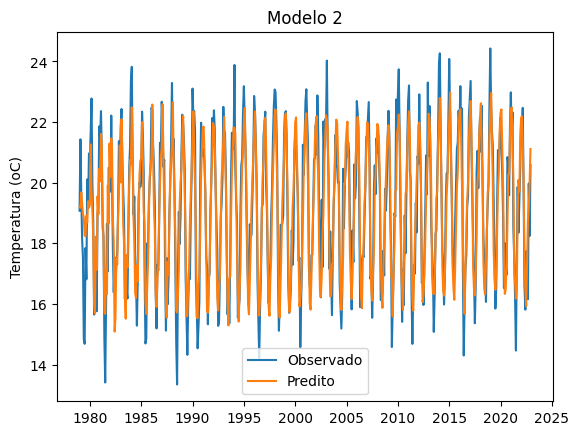

In [18]:
# fit model
model2=ARIMA(temp,order=(1,0,0),seasonal_order=(1,0,1,12)) # SARIMA - seasonal
model2_fit = model2.fit()
# summary of fit model
print(model2_fit.summary())
# line plot of residuals
residuals2 = pd.DataFrame(model2_fit.resid)
residuals2.plot(title='Gráfico dos resíduos')
plt.show()
# density plot of residuals
residuals2.plot(kind='kde', title='Distribuição dos resíduos')
plt.show()
# summary stats of residuals
print(residuals2.describe())
# Aplicando o modelo aos dados
pred2 = model2.fit().predict()
plt.plot(temp.index, temp, label='Observado')
plt.plot(pred2.index, pred2, label='Predito')
plt.ylabel('Temperatura (oC)')
plt.title('Modelo 2')
plt.legend()
plt.show()

Exercício: Ler a aba "exercicio" da mesma planilha, que uma série temporal de consumo de energia elétrica.

*   A série temporal possui tendência e sazonalidade?
*   Avalie as funções ACF e PACF e verifique se a série mostra evidências de processos de autocorrelação (AR) e de média móvel (MA).
*   Aplique um modelo da família ARIMA, escolhendo a ordem mais adequada




